In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft

In [8]:
# Carga el archivo de audio (reemplaza 'audio.wav' con tu nombre de archivo)
sample_rate, audio_data = wavfile.read('Celular.wav')

In [12]:
# Realiza la transformada de Fourier para obtener el espectro de frecuencia
frequencies = np.fft.fftfreq(len(audio_data), d=1/sample_rate)
magnitude_spectrum = np.abs(fft(audio_data))

In [15]:
# Limita el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies = frequencies[:len(frequencies)//2]
positive_magnitude = magnitude_spectrum[:len(magnitude_spectrum)//2]

In [23]:
# Calcula la potencia de la señal deseada (parte de la señal de audio)
signal_power = np.sum(audio_data ** 2) / len(audio_data)

# Calcula la potencia del ruido (diferencia entre la potencia total y la potencia de la señal)
total_power = np.sum(audio_data ** 2)
noise_power = total_power - signal_power

# Calcula el SNR en decibelios (dB)
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"SNR: {snr_db:.2f} dB")

SNR: -57.05 dB


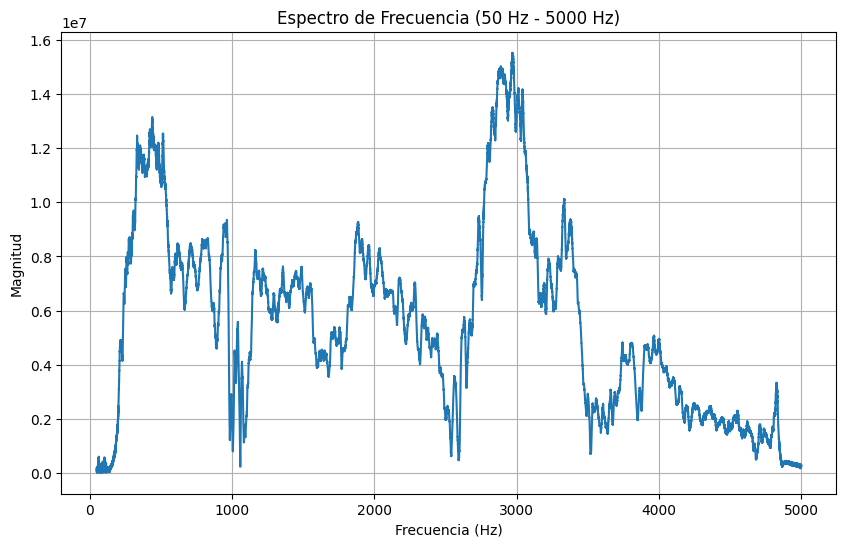

In [18]:
# Definir los límites de frecuencia para la gráfica
lower_limit = 50  # Hz
upper_limit = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index = np.argmax(positive_frequencies >= lower_limit)
upper_index = np.argmax(positive_frequencies >= upper_limit)

# Grafica el espectro de frecuencia limitado
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies[lower_index:upper_index], positive_magnitude[lower_index:upper_index])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia (50 Hz - 5000 Hz)')
plt.grid()
plt.show()

In [19]:
# Aplicar ventana de Hamming a la señal
hamming_window = np.hamming(len(audio_data))
windowed_audio = audio_data * hamming_window

In [20]:
# Realizar la transformada de Fourier para obtener el espectro de frecuencia
frequencies_hamming = np.fft.fftfreq(len(windowed_audio), d=1/sample_rate)
magnitude_spectrum_hamming = np.abs(fft(windowed_audio))

In [21]:
# Limitar el rango de frecuencias a la mitad positiva (no considera simetría)
positive_frequencies_hamming = frequencies_hamming[:len(frequencies_hamming)//2]
positive_magnitude_hamming = magnitude_spectrum_hamming[:len(magnitude_spectrum_hamming)//2]

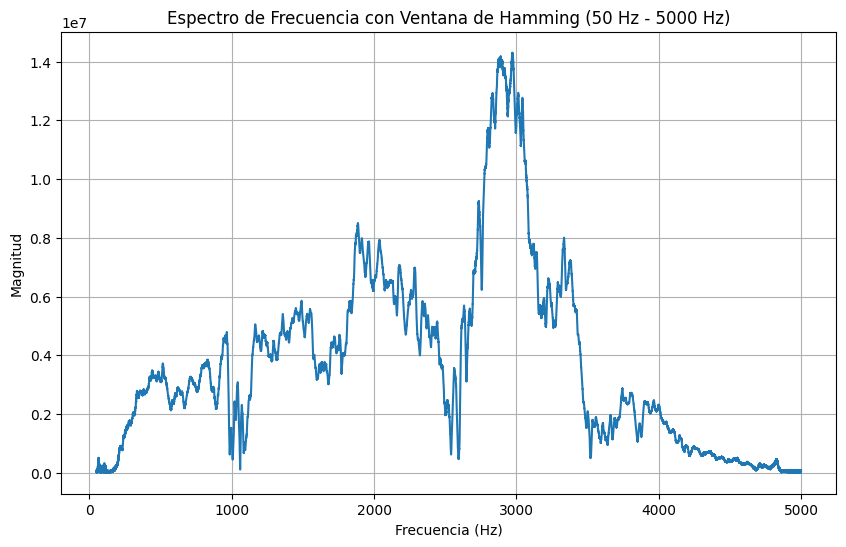

In [22]:
# Definir los límites de frecuencia para la gráfica
lower_limit_hamming = 50  # Hz
upper_limit_hamming = 5000  # Hz

# Encontrar los índices correspondientes a los límites de frecuencia
lower_index_hamming = np.argmax(positive_frequencies_hamming >= lower_limit_hamming)
upper_index_hamming = np.argmax(positive_frequencies_hamming >= upper_limit_hamming)

# Graficar el espectro de frecuencia limitado con ventana de Hamming
plt.figure(figsize=(10, 6))
plt.plot(positive_frequencies_hamming[lower_index_hamming:upper_index_hamming], positive_magnitude_hamming[lower_index_hamming:upper_index_hamming])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia con Ventana de Hamming (50 Hz - 5000 Hz)')
plt.grid()
plt.show()